In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.ensemble import GradientBoostingClassifier


In [6]:
# 1.
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
data = pd.read_csv(url)

print("Dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
data.head()

Dataset shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [7]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [8]:
# 2.
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()

# data_removed[numerical_cols] = scaler.fit_transform(data_removed[numerical_cols])
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
categorical_cols = ['sex','cp', 'fbs', 'restecg', 'exang','slope', 'thal','ca']

# df = pd.get_dummies(data_removed, columns = categorical_cols, drop_first=True)
df = pd.get_dummies(data, columns = categorical_cols, drop_first=True)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})
print(df.head())


        age  trestbps      chol   thalach   oldpeak  num  sex_1  cp_2  cp_3  \
0  0.948726  0.757525 -0.264900  0.017197  1.087338    0      1     0     0   
1  1.392002  1.611220  0.760415 -1.821905  0.397182    2      1     0     0   
2  1.392002 -0.665300 -0.342283 -0.902354  1.346147    1      1     0     0   
3 -1.932564 -0.096170  0.063974  1.637359  2.122573    0      1     0     1   
4 -1.489288 -0.096170 -0.825922  0.980537  0.310912    0      0     1     0   

   cp_4  ...  restecg_1  restecg_2  exang_1  slope_2  slope_3  thal_6.0  \
0     0  ...          0          1        0        0        1         1   
1     1  ...          0          1        1        1        0         0   
2     1  ...          0          1        1        1        0         0   
3     0  ...          0          0        0        0        1         0   
4     0  ...          0          1        0        0        0         0   

   thal_7.0  ca_1.0  ca_2.0  ca_3.0  
0         0       0       0       0 

In [9]:
#3
print(df.shape)
print("\nData types:")
print(df.dtypes)


(303, 21)

Data types:
age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
num            int64
sex_1          int64
cp_2           int64
cp_3           int64
cp_4           int64
fbs_1          int64
restecg_1      int64
restecg_2      int64
exang_1        int64
slope_2        int64
slope_3        int64
thal_6.0       int64
thal_7.0       int64
ca_1.0         int64
ca_2.0         int64
ca_3.0         int64
dtype: object


In [10]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                age      trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.465641e-18  4.426236e-16  2.345026e-16 -1.172513e-16  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -2.145037e+00 -2.334877e+00 -3.442067e+00 -8.968617e-01   
25%   -7.135564e-01 -6.652997e-01 -6.905030e-01 -7.053073e-01 -8.968617e-01   
50%    1.729945e-01 -9.616980e-02 -1.101357e-01  1.485618e-01 -2.067053e-01   
75%    7.270888e-01  4.729601e-01  5.476139e-01  7.178079e-01  4.834512e-01   
max    2.500191e+00  3.887739e+00  6.138485e+00  2.294182e+00  4.451851e+00   

              num       sex_1        cp_2        cp_3        cp_4  ...  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  ...   
mean     0.937294    0.679868    0.165017    0.283828    0.475248  ...   
std      1.228536    0.467299    0.371809    

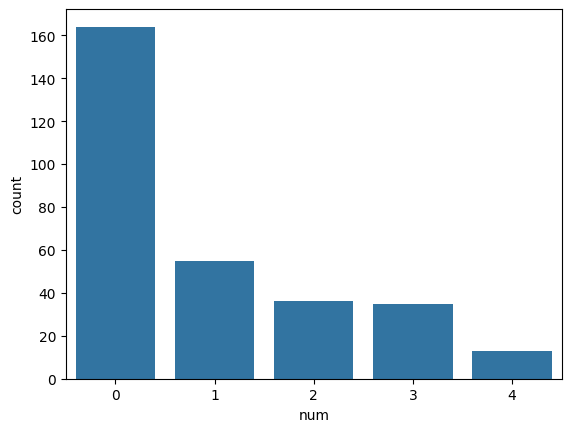

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [11]:
sns.countplot(x="num", data=df)
plt.show()
print(df['num'].value_counts())